This ipython notebook determines the conductivity for different mantle compositions including the melt proportions and also presence of water.

In [2]:
# Importing necessary libraries

import numpy as np;
import matplotlib.pyplot as maps;
import math;

## Olivine

The conductivity model for olivine implemented here is inspired from Yoshino et al., 2006. A brief summary may be presented as:

The conductivity of olivine is mainly because of three conductivity mechansims
* Ionic conduction: This mechanism plays a major role in conductivity at relatively higher temperatures (>1700 K) and therefore its activation enthalpy too are considerable around these temperatures only. Below these temperatures, the activation energy is pretty less. The conduction is due to semiconductor defects and vacancies
* Polaron conduction: This plays a major role in temperature range 1300 K- 1700 K. The conduction is due to electron-hole (polarons) hopping between ferrous and ferric ions.
* Proton conduction: This mechanism explains higher conductivity at lower temperatures (< 1300 K). The conduction is due to the proton hopping amongst point defects. It depends on the presence of water content (Pre-exponential factor decreases while activation enthalpy decreases with increasing water content).

In [3]:
def ol_cond(T, Cw):
    """
    T= Temperature in Kelvin
    Cw= Concentration of water (in weight per cent)
    """
    k= 8.61734279*10**-5;
    # ionic 
    A_ionic= 10**4.73;
    H_ionic= 2.31;
    
    # polaron
    A_polaron= 10**2.98;
    H_polaron= 1.71;
    
    # proton
    A_proton= 10**1.90;
    H_proton= 0.92;
    alpha= 0.16;
    
    idx_ionic= (T>= 1700);
    idx_polaron= np.logical_and(T>=1300,T<1700);
    idx_proton= (T< 1300);
    
    C_ionic= A_ionic* np.exp(-H_ionic/k/T);
    C_polaron= A_polaron* np.exp(-H_polaron/k/T);
    C_proton= A_proton* Cw* np.exp(-(H_proton- alpha* Cw**(1/3))/k/T);
    
    C_tot= C_ionic+ C_polaron+ C_proton;
    
    id_ionic= np.array(idx_ionic, dtype= int);
    id_polaron= np.array(idx_polaron, dtype= int);
    id_proton= np.array(idx_proton, dtype= int);
    
    C_ol= C_ionic*id_ionic+ C_polaron*id_polaron+ C_proton*id_proton;
    
    
    idx= {'ionic': idx_ionic, 'polaron': idx_polaron, 'proton': idx_proton};
    C= {'ionic': C_ionic, 'polaron': C_polaron, 'proton': C_proton, 'total': C_tot, 'ol': C_ol};
    
    return [idx, C];


Let's test our model by plotting donductivities for a temperature range

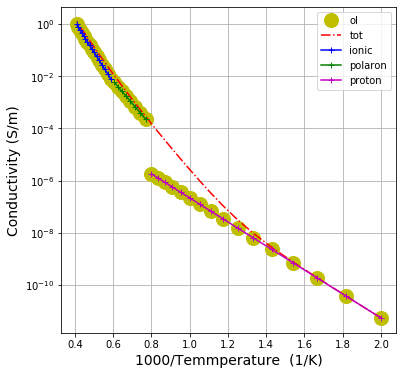

In [4]:
T= np.arange(500,2500, 50);
[idx, C]= ol_cond(T= T, Cw= 0.00010729613733905579);
T_ionic= T[idx['ionic']];
T_polaron= T[idx['polaron']];
T_proton= T[idx['proton']];

C_ionic= C['ionic'][idx['ionic']];
C_polaron= C['polaron'][idx['polaron']];
C_proton= C['proton'][idx['proton']];
C_tot= C['total'];
C_ol= C['ol'];

fig, ax= maps.subplots(1, figsize= (6,6))

ax.semilogy(1000/T,C_ol, 'yo', markersize= 14, label= 'ol')
ax.semilogy(1000/T,C_tot, 'r-.', label= 'tot')
ax.semilogy(1000/T_ionic, C_ionic, 'b+-', label= 'ionic')
ax.semilogy(1000/T_polaron, C_polaron, 'g+-', label= 'polaron')
ax.semilogy(1000/T_proton, C_proton, 'm+-', label= 'proton')
#ax.set_ylim([10**(-8), 1]);
ax.legend();
ax.set_ylabel('Conductivity (S/m)', fontsize= 14);
ax.set_xlabel('1000/Temmperature  (1/K)', fontsize= 14);
ax.grid('on')

Looks good!

## Orthopyroxene
Conductivity mechanism in case of orthopyroxene is taken from Zhang et al., 2012. Study of water content in orthopyoxene becomes more important because it can hold more water compared to olivine.
There are two conductivity mechanisms discussed (The mechanisms are discussed briefly in the Olivine section.):
* Polaron conductivity: This mechanism is considered playing the major role when T< 1300 K.
* Proton conductivity: T >= 1300 K
We do not see ionic conductivity in case of orthopyroxene. Also, there were various variations when comparing with the previous studies, which Zhang et al.. 2012 said were probably due to iron content so that must be taken into account and considered later on.

In [6]:
def opx_cond(T, Cw):
    """
    T= Temperature in Kelvin
    Cw= Concentration of water (in weight percent)
    """
    k= 8.61734279*10**-5;
    
    # polaron
    A_polaron= 10**3.99;
    H_polaron= 1.88;
    
    # proton
    A_proton= 10**2.58;
    H_proton= 0.84;
    alpha= 0.08;
    
    idx_polaron= (T>=1300);
    idx_proton= (T< 1300);
    
    C_polaron= A_polaron* np.exp(-H_polaron/k/T);
    C_proton= A_proton* Cw* np.exp(-(H_proton- alpha* Cw**(1/3))/k/T);
    
    C_tot= C_polaron+ C_proton;
    
    id_polaron= np.array(idx_polaron, dtype= int);
    id_proton= np.array(idx_proton, dtype= int);
    
    C_opx= C_polaron*id_polaron+ C_proton*id_proton;
    
    idx= {'polaron': idx_polaron, 'proton': idx_proton};
    C= {'polaron': C_polaron, 'proton': C_proton, 'total': C_tot, 'opx': C_opx};
    
    return [idx, C];


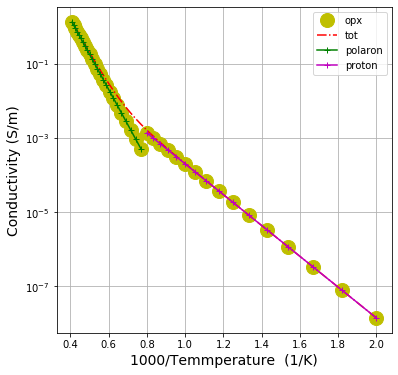

In [12]:
T= np.arange(500,2500, 50);
[idx, C]= opx_cond(T= T, Cw= 0.0075107296137339056) #0.001);
T_polaron= T[idx['polaron']];
T_proton= T[idx['proton']];

C_polaron= C['polaron'][idx['polaron']];
C_proton= C['proton'][idx['proton']];
C_tot= C['total'];
C_opx= C['opx'];

fig, ax= maps.subplots(1, figsize= (6,6))

ax.semilogy(1000/T,C_opx, 'yo', markersize= 14, label= 'opx')
ax.semilogy(1000/T,C_tot, 'r-.', label= 'tot')
ax.semilogy(1000/T_polaron, C_polaron, 'g+-', label= 'polaron')
ax.semilogy(1000/T_proton, C_proton, 'm+-', label= 'proton')
#ax.set_ylim([10**(-8), 1]);
ax.legend();
ax.set_ylabel('Conductivity (S/m)', fontsize= 14);
ax.set_xlabel('1000/Temmperature  (1/K)', fontsize= 14);
ax.grid('on')



## Clinopyroxene

Clinopyroxene has the highest water holding capacity amongst the mantle minerals. The code implemented below was derived from Yang et al., 2011 and though it was not part of their primary study, there were marked differences observed because of the variation of Iron content (XFe) and should be noted. We will, therefore, not include the effect of XFe in our study as of now, but this needs to be integrated further on. The conductivity mechanisms suggested were polaron and proton conduction unlike olivine and orthopyroxene, there is no temperature variation below or above which the mechanisms take different roles.

While fitting the data, Yang et al., 2011 considered only one type of mechanism taking place. Therefore, only proton conduction will be used when there is presence of water and only polaron conduction in the absence of it.

In [9]:
def cpx_cond(T, Cw):
    """
    T= Temperature in Kelvin
    Cw= Concentration of water (in weight percent)
    """
    k= 8.61734279*10**-5;
    
    # polaron
    A_polaron= 10**2.16;
    H_polaron= 1.06 # 102 kJ/mol
    
    # proton
    A_proton= 10**3.56;
    H_proton= 0.73; # 71 kJ/mol
    r= 1.13;
    
    idx_polaron= (T>=0);
    idx_proton= (T>=0);
    
    C_polaron= A_polaron* np.exp(-H_polaron/k/T);
    C_proton= A_proton* (Cw**r)* np.exp(-H_proton/k/T);
    
    C_tot= C_polaron+ C_proton;
    
    id_polaron= np.array(idx_polaron, dtype= int);
    id_proton= np.array(idx_proton, dtype= int);
    if Cw==0:
        C_cpx= C_polaron;
    else:
        C_cpx= C_proton;
        
    idx= {'polaron': idx_polaron, 'proton': idx_proton};
    C= {'polaron': C_polaron, 'proton': C_proton, 'total': C_tot, 'cpx': C_cpx};
    
    return [idx, C];


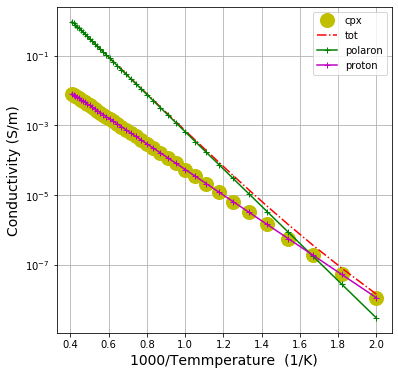

In [11]:
T= np.arange(500,2500, 50);
[idx, C]= cpx_cond(T= T, Cw= 0.00021459227467811158) #90/(10**6));
T_polaron= T[idx['polaron']];
T_proton= T[idx['proton']];

C_polaron= C['polaron'][idx['polaron']];
C_proton= C['proton'][idx['proton']];
C_tot= C['total'];
C_cpx= C['cpx'];

fig, ax= maps.subplots(1, figsize= (6,6))

ax.semilogy(1000/T,C_cpx, 'yo', markersize= 14, label= 'cpx')
ax.semilogy(1000/T,C_tot, 'r-.', label= 'tot')
ax.semilogy(1000/T_polaron, C_polaron, 'g+-', label= 'polaron')
ax.semilogy(1000/T_proton, C_proton, 'm+-', label= 'proton')
#ax.set_ylim([10**(-8), 1]);
ax.legend();
ax.set_ylabel('Conductivity (S/m)', fontsize= 14);
ax.set_xlabel('1000/Temmperature  (1/K)', fontsize= 14);
ax.grid('on')

## Garnet
The codes developed here are inspired by the study of Dai and Karato, 2009. Like clinopyroxene, only one type of conduction mechanism will be considered at a time, and there are no temperature boundations as such. The model for dry conduction also requires temperature dependence, which at the moment we will take constant at 8 GPa.


In [14]:
def gt_cond(T, Cw):
    """
    T= Temperature in Kelvin
    Cw= Concentration of water (in weight percent)
    """
    k= 8.61734279*10**-5;
    P= 8;
    # polaron
    A0= 1036;
    B= 0.044;
    A_polaron= A0*(1-B*P);
    E_polaron= 128;
    V_polaron= 2.50;
    H_polaron= (E_polaron+ P*V_polaron)/96.48 # kJ/mol => eV
    
    # proton
    A_proton= 1950;
    E_proton= 70;
    V_proton= -0.57;
    H_proton= (E_proton+ P*V_proton)/96.48; # kJ/mol => eV
    r= 0.63;
    
    idx_polaron= (T>=0);
    idx_proton= (T>=0);
    
    C_polaron= A_polaron* np.exp(-H_polaron/k/T);
    C_proton= A_proton* (Cw**r)* np.exp(-H_proton/k/T);
    
    C_tot= C_polaron+ C_proton;
    
    id_polaron= np.array(idx_polaron, dtype= int);
    id_proton= np.array(idx_proton, dtype= int);
    if Cw==0:
        C_gt= C_polaron;
    else:
        C_gt= C_proton;
        
    idx= {'polaron': idx_polaron, 'proton': idx_proton};
    C= {'polaron': C_polaron, 'proton': C_proton, 'total': C_tot, 'gt': C_gt};
    
    return [idx, C];


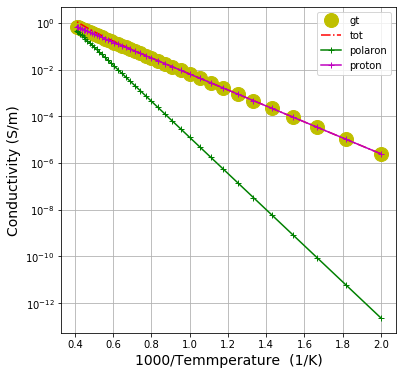

In [15]:
T= np.arange(500,2500, 50);
[idx, C]= gt_cond(T= T, Cw= 0.00053475935828877) #0.0046); 
T_polaron= T[idx['polaron']];
T_proton= T[idx['proton']];

C_polaron= C['polaron'][idx['polaron']];
C_proton= C['proton'][idx['proton']];
C_tot= C['total']; 
C_gt= C['gt'];

fig, ax= maps.subplots(1, figsize= (6,6))

ax.semilogy(1000/T,C_gt, 'yo', markersize= 14, label= 'gt')
ax.semilogy(1000/T,C_tot, 'r-.', label= 'tot')
ax.semilogy(1000/T_polaron, C_polaron, 'g+-', label= 'polaron')
ax.semilogy(1000/T_proton, C_proton, 'm+-', label= 'proton')
#ax.set_ylim([10**(-8), 1]);
ax.legend();
ax.set_ylabel('Conductivity (S/m)', fontsize= 14);
ax.set_xlabel('1000/Temmperature  (1/K)', fontsize= 14);
ax.grid('on')

## Bulk Conductivity of mineral assemblage

It should be noted that for all the above minerals, proton conductivity is a significant (even dominant) cause of electrical conductivity. This requires a certain Cw for them, without which the function, will give theconductivities but those are definitely skewed. The following function returns the upper and lower Hashim Strickman bounds for the mineral assemblages.
### Partion water
This is the ratio of water between a pair of minerals. The coefficient of water distribution between different minerals is used along with mineral concentrations to get the water concentrations for each. The partition coefficient $D^{cpx/opx}_{OH}$ is fairly consistent across studies and equal to 2.0. Our function, therefore, takes this value though there is an option to take another value as well. We also take $D^{cpx/ol}_{OH}$ as input and $D^{opx/ol}_{OH}$ can then be estimated as the product of the other two.

By Qunke and Tao, 2013, the water content in olivine and garnet is taken identical.

In [10]:
def bulk_cond(comp, T, cw):
    """
    comp= composition of the melt assemblage [Ol, Opx, Cpx, Gt]
    T= Temperature in Kelvin
    cw= bulk water concentration
    Outputs the bulk conductivity of the melt assemblage consisting of Ol, Opx, Cpx, Gt
    """
    _, ol= ol_cond(T, Cw= cw['ol'])# 0.005);
    if cw['ol']==0.:
        ol= ol['total'];
    else:
        ol= ol['ol'];
        
    _, opx= opx_cond(T, Cw= cw['opx']) # 0.001);
    if cw['opx']==0.:
        opx= opx['total'];
    else:
        opx= opx['opx'];
    
    _, cpx= cpx_cond(T, Cw= cw['cpx']) #90/(10**6));
    cpx= cpx['cpx'];
    
    gt= gt['gt'];
    
    cond= np.array([ol, opx, cpx, gt]);
    c_max= np.array([np.max(cond[:,i]) for i in range(0, len(T))]);
    c_min= np.array([np.min(cond[:,i]) for i in range(0, len(T))]);
    HS_l= np.array([1/np.sum(comp/(cond[:,i]+2*c_min[i]))- 2*c_min[i] for i in range(0, len(T))]);
    HS_u= np.array([1/np.sum(comp/(cond[:,i]+2*c_max[i]))- 2*c_max[i] for i in range(0, len(T))]);
    #print(cond)
    HS= {"lower": HS_l, "upper": HS_u};
    
    return HS;


In [11]:
def get_cw(comp, Cw, D2, D1= 2.0):
    """
    comp= Mineral composition
    Cw= Total water composition
    D1= D_cpx/opx
    D2= D_cpx/ol
    Outputs the tuple of water concentration for minerals
    """ 

    D3= D1*D2; # D_opx/ol;
    comp[0]= comp[0]+ comp[3]; # water content is identical in olivine and garnet
    x= Cw/(comp[0]+ comp[1]*D3+ comp[2]*D1);
    cw= {"ol":x, "cpx": D1*x, "opx": D3*x, "gt":x};
    return cw
